Loading images from /content/drive/MyDrive/Public/samlet_greyscale: 100%|██████████| 100/100 [05:02<00:00,  3.02s/it]


['image_1.png', 'image_2.png', 'image_3.png', 'image_4.png', 'image_5.png', 'image_6.png', 'image_7.png', 'image_8.png', 'image_9.png', 'image_10.png', 'image_11.png', 'image_12.png', 'image_13.png', 'image_14.png', 'image_15.png', 'image_16.png', 'image_17.png', 'image_18.png', 'image_19.png', 'image_20.png', 'image_21.png', 'image_22.png', 'image_23.png', 'image_24.png', 'image_25.png', 'image_26.png', 'image_27.png', 'image_28.png', 'image_29.png', 'image_30.png', 'image_31.png', 'image_32.png', 'image_33.png', 'image_34.png', 'image_35.png', 'image_36.png', 'image_37.png', 'image_38.png', 'image_39.png', 'image_40.png', 'image_41.png', 'image_42.png', 'image_43.png', 'image_44.png', 'image_45.png', 'image_46.png', 'image_47.png', 'image_48.png', 'image_49.png', 'image_50.png', 'image_51.png', 'image_52.png', 'image_53.png', 'image_54.png', 'image_55.png', 'image_56.png', 'image_57.png', 'image_58.png', 'image_59.png', 'image_60.png', 'image_61.png', 'image_62.png', 'image_63.png', 

Loading images from /content/drive/MyDrive/Public/samlet_gen_images: 100%|██████████| 100/100 [00:02<00:00, 46.14it/s]


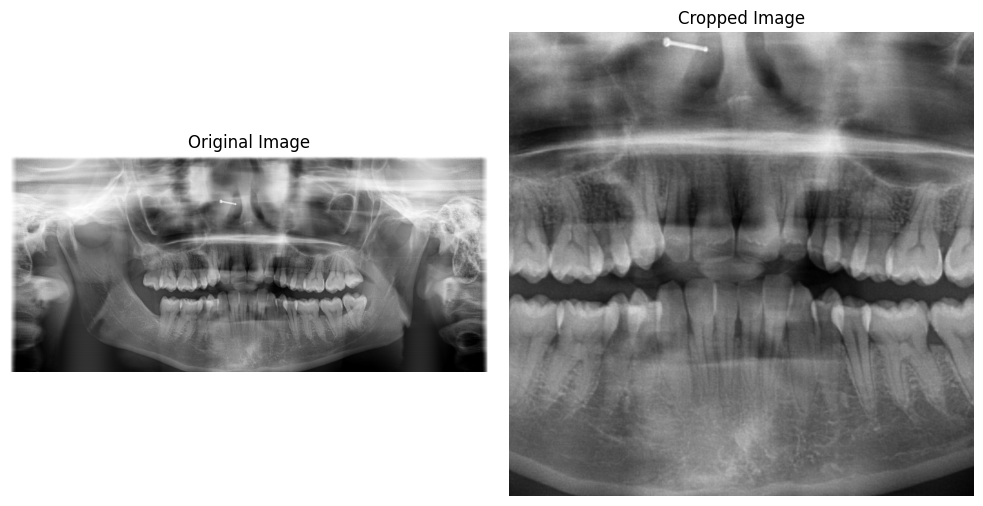

(256, 256)
(1024, 1024)


In [ ]:
win_size = 21
import os
from tqdm import tqdm
from PIL import Image
import numpy as np
np.random.seed(0)

def load_images_from_folder_real(folder, num_images=100):
    """
    Load a limited number of images from a folder as PIL images.
    """
    images = []
    # Get all image files in the folder
    image_files = [f for f in os.listdir(folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Select a random sample of image files
    selected_files = np.random.choice(image_files, min(num_images, len(image_files)), replace=False)

    for file in tqdm(selected_files, desc=f"Loading images from {folder}"):
        path = os.path.join(folder, file)
        try:
            img = Image.open(path).convert("RGB")
            images.append(img)  # Append the PIL image directly
        except Exception as e:
            print(f"Error loading {file}: {e}")

    return images  # Return a list of PIL images


from natsort import natsorted

def load_images_from_folder_gen(folder):
    """
    Load images from a folder in ascending order based on natural sorting.
    """
    images = []
    # Get all image files in the folder
    image_files = [f for f in os.listdir(folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Sort files naturally (e.g., image_1.png, image_2.png, ...)
    sorted_files = natsorted(image_files)
    print(sorted_files)
    for file in tqdm(sorted_files, desc=f"Loading images from {folder}"):
        path = os.path.join(folder, file)
        try:
            img = Image.open(path).convert("RGB")
            images.append(img)  # Append the PIL image directly
        except Exception as e:
            print(f"Error loading {file}: {e}")

    return images  # Return a list of PIL images



# Path to the folder containing images
real_data_path = "/content/drive/MyDrive/Public/samlet_greyscale"
generated_data_path = "/content/drive/MyDrive/Public/samlet_gen_images"

# Load images
real_images = load_images_from_folder_real(real_data_path, num_images=100)
generated_images = load_images_from_folder_gen(generated_data_path)

import matplotlib.pyplot as plt
import numpy as np

def crop_bottom_center(img, output_size):
    pil_img = img  # Convert NumPy array to PIL Image
    width, height = pil_img.size
    new_width, new_height = output_size,output_size
    left = (width - new_width) // 2
    bottom = height
    top = bottom - new_height
    return pil_img.crop((left, top, left + new_width, bottom))

img = real_images[0]
cropped_img = crop_bottom_center(img, 1024)

# Display original and cropped images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(img)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(cropped_img)
ax[1].set_title("Cropped Image")
ax[1].axis("off")

plt.tight_layout()
plt.show()
cropped_real_images = []
for each_img in real_images:
  croppedimg = crop_bottom_center(each_img, 1024)
  cropped_real_images.append(croppedimg)

print(generated_images[0].size)
print(cropped_real_images[0].size)

In [ ]:
from PIL import Image

# Assume cropped_real_images is a list of PIL Images
resized_cropped_real_images = [img.resize((256, 256)) for img in cropped_real_images]

# Example: Print sizes of the first images from both lists
print("Original size:", cropped_real_images[0].size)
print("Resized size:", resized_cropped_real_images[0].size)


Original size: (1024, 1024)
Resized size: (256, 256)


In [ ]:
print("Generated Images size:", generated_images[0].size)
print("Real Images size:", resized_cropped_real_images[0].size)

Generated Images size: (256, 256)
Real Images size: (256, 256)


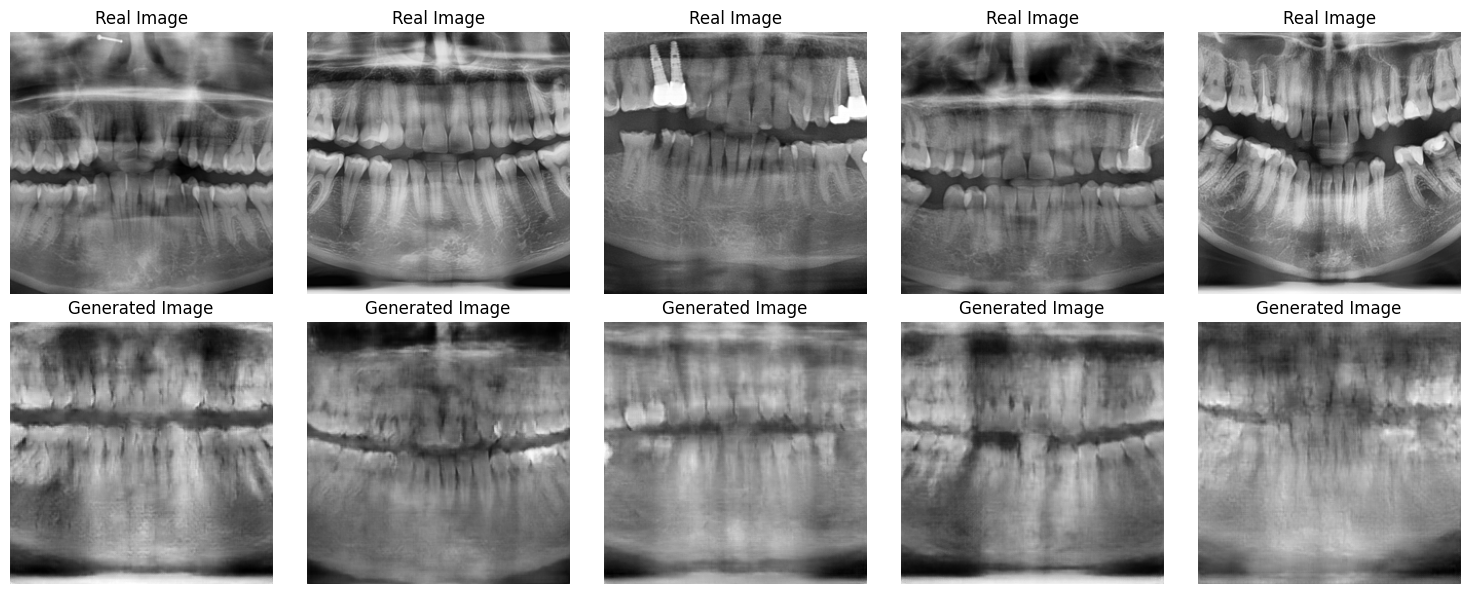

In [ ]:
import matplotlib.pyplot as plt

# Display 5 samples from resized_cropped_real_images and generated_images
def show_samples(real_images, generated_images):
    # Select the first 5 images from each list
    real_samples = real_images[:5]
    generated_samples = generated_images[:5]

    # Create a plot with 2 rows and 5 columns
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))

    # Show real images in the first row
    for i, img in enumerate(real_samples):
        axes[0, i].imshow(img)
        axes[0, i].axis('off')
        axes[0, i].set_title("Real Image")

    # Show generated images in the second row
    for i, img in enumerate(generated_samples):
        axes[1, i].imshow(img)
        axes[1, i].axis('off')
        axes[1, i].set_title("Generated Image")

    # Adjust spacing and show the plot
    plt.tight_layout()
    plt.show()

# Call the function to display samples
show_samples(resized_cropped_real_images, generated_images)


In [ ]:
import numpy as np

# Convert lists of PIL images to arrays of arrays
resized_cropped_real_images_array = np.array([np.asarray(img) for img in resized_cropped_real_images])
generated_images_array = np.array([np.asarray(img) for img in generated_images])

# Convert lists of PIL images to arrays of arrays
resized_cropped_real_images_array_X = np.array([np.asarray(img.convert("L")) for img in resized_cropped_real_images])
generated_images_array_X = np.array([np.asarray(img.convert("L")) for img in generated_images])

# Print the shapes to confirm
print("Resized Cropped Real Images Array Shape:", resized_cropped_real_images_array.shape)
print("Generated Images Array Shape:", generated_images_array.shape)


Resized Cropped Real Images Array Shape: (100, 256, 256, 3)
Generated Images Array Shape: (100, 256, 256, 3)


Average SSIM: 0.18876430303031688


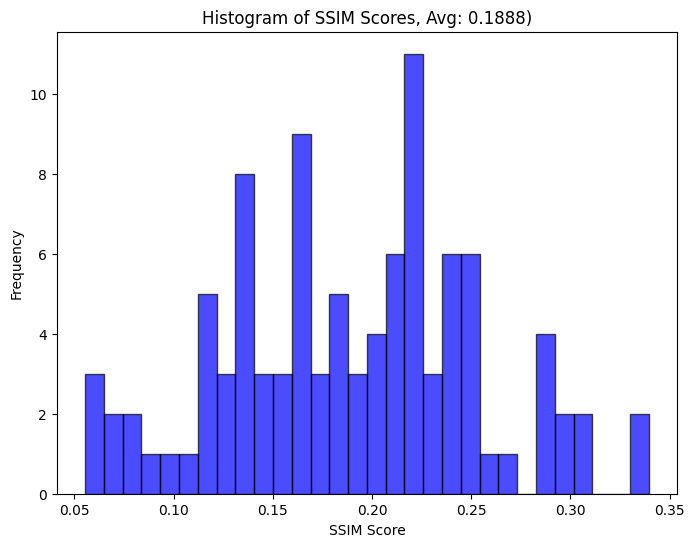

In [ ]:
from skimage.metrics import structural_similarity as ssim
import numpy as np
import matplotlib.pyplot as plt

# Determine the minimum dimension of your images
min_dim = min(resized_cropped_real_images_array_X[0].shape[:2])
# win_size = min(7, min_dim if min_dim % 2 == 1 else min_dim - 1)  # Ensure win_size is odd and valid
win_size = win_size
# print(f"Using win_size: {win_size}")

# Calculate SSIM for each pair of images
ssim_scores = []

for real_img, gen_img in zip(resized_cropped_real_images_array_X, generated_images_array_X):
    score, _ = ssim(real_img, gen_img, full=True, win_size=win_size, channel_axis=-1)
    ssim_scores.append(score)

# Convert to NumPy array for further processing
ssim_scores = np.array(ssim_scores)

# Compute the average SSIM
average_ssim = np.mean(ssim_scores)
print(f"Average SSIM: {average_ssim}")

# Plot the histogram of SSIM scores
plt.figure(figsize=(8, 6))
plt.hist(ssim_scores, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title(f"Histogram of SSIM Scores, Avg: {average_ssim:.4f})")  # Add average SSIM to title
plt.xlabel("SSIM Score")
plt.ylabel("Frequency")
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("ssim_100_avg.pdf", dpi=600)
plt.show()



In [ ]:
!pip install torch-fidelity


In [ ]:
import torch
from torchvision.utils import save_image
import os
import tempfile
from torch_fidelity import calculate_metrics

# Normalize images to [0, 1] and convert to PyTorch tensors
def prepare_images(images):
    return torch.tensor(images).permute(0, 2, 1).float() / 255.0  # Convert [N, H, W, C] to [N, C, H, W]

# Prepare real and generated images
real_images_tensor = prepare_images(resized_cropped_real_images_array_X)
generated_images_tensor = prepare_images(generated_images_array_X)

# Use temporary directories to store images
with tempfile.TemporaryDirectory() as real_dir, tempfile.TemporaryDirectory() as gen_dir:
    # Save real images
    for i, img in enumerate(real_images_tensor):
        save_image(img, os.path.join(real_dir, f"real_{i}.png"))
    # Save generated images
    for i, img in enumerate(generated_images_tensor):
        save_image(img, os.path.join(gen_dir, f"gen_{i}.png"))

    # Calculate FID
    metrics = calculate_metrics(
        input1=real_dir,
        input2=gen_dir,
        fid=True,  # Enable FID calculation
        verbose=True
    )
    fid_score = metrics['frechet_inception_distance']

print(f"FID Score: {fid_score}")


Creating feature extractor "inception-v3-compat" with features ['2048']
Downloading: "https://github.com/toshas/torch-fidelity/releases/download/v0.2.0/weights-inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/weights-inception-2015-12-05-6726825d.pth
100%|██████████| 91.2M/91.2M [00:00<00:00, 128MB/s]
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpfz7re1x1" with extensions png,jpg,jpeg
Found 100 samples
/usr/local/lib/python3.10/dist-packages/torch_fidelity/datasets.py:16: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(img.tobytes())).view(height, width, 3)
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWa

FID Score: 278.17959528032054


Frechet Inception Distance: 278.17959528032054


What is win size in SSIM?


SSIM is computed locally for different parts of the image by dividing it into small regions (or windows). The win_size defines the dimensions of these regions (e.g., 7x7, 5x5). It determines how localized the SSIM calculation is.


win_size must be an odd integer. We kept it 3
win_size must be smaller than or equal to the smallest dimension of the input image (width or height).

A smaller window captures more localized variations, making SSIM sensitive to finer image details.

A larger window captures more global statistics, which may smooth out local variations, making SSIM less sensitive to fine-grained details.


When to Adjust: If the image dimensions are smaller than the default win_size (7x7), you must reduce win_size accordingly. For very small images, set win_size to a smaller odd number, such as 3x3 or 5x5.

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

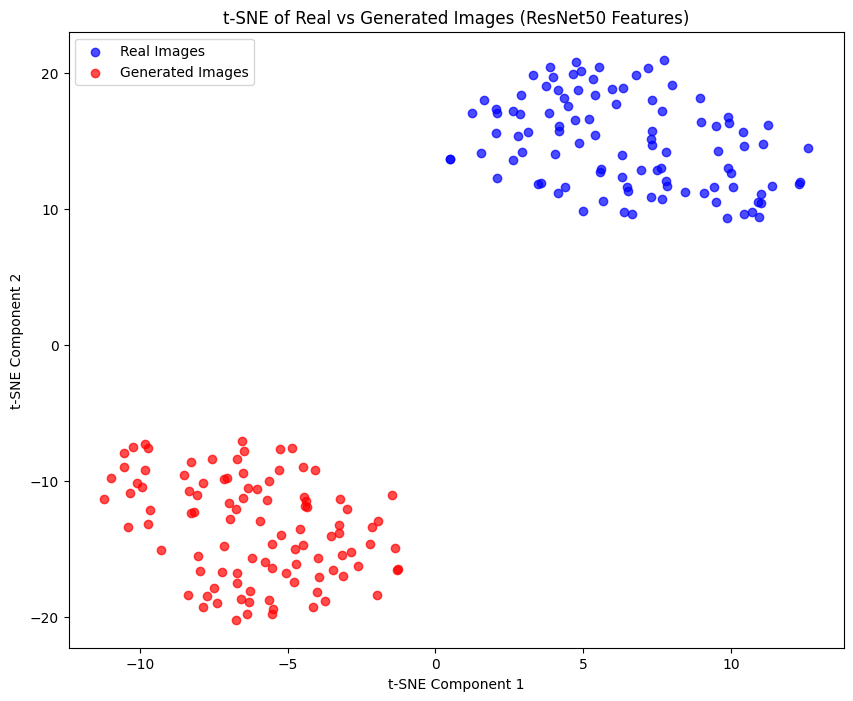

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Function to extract features using ResNet50
def extract_features(img_array, model):
    # Resize and preprocess image array for the model
    img_resized = tf.image.resize(img_array, (224, 224))  # Resize to 224x224 for ResNet50
    img_preprocessed = preprocess_input(img_resized.numpy())  # Preprocessing for ResNet50
    img_expanded = np.expand_dims(img_preprocessed, axis=0)  # Add batch dimension
    features = model.predict(img_expanded)  # Get features from ResNet50
    return features.flatten()  # Flatten to 1D vector

# Load the pretrained ResNet50 model without top layers (for feature extraction)
resnet_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Extract features for real and generated images
real_image_features = []
generated_image_features = []

for real_img, gen_img in zip(resized_cropped_real_images_array, generated_images_array):
    real_features = extract_features(real_img, resnet_model)
    generated_features = extract_features(gen_img, resnet_model)
    real_image_features.append(real_features)
    generated_image_features.append(generated_features)

# Convert lists to NumPy arrays
real_image_features = np.array(real_image_features)
generated_image_features = np.array(generated_image_features)

# Combine the real and generated image features for t-SNE
all_features = np.concatenate([real_image_features, generated_image_features], axis=0)
labels = np.concatenate([np.zeros(len(real_image_features)), np.ones(len(generated_image_features))])

# Apply t-SNE to reduce the dimensionality to 2D for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(all_features)

# Plot t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:len(real_image_features), 0], tsne_results[:len(real_image_features), 1], c='blue', label='Real Images', alpha=0.7)
plt.scatter(tsne_results[len(real_image_features):, 0], tsne_results[len(real_image_features):, 1], c='red', label='Generated Images', alpha=0.7)
plt.title("t-SNE of Real vs Generated Images (ResNet50 Features)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.savefig("tsne_100_avg.pdf", dpi=600)
plt.show()



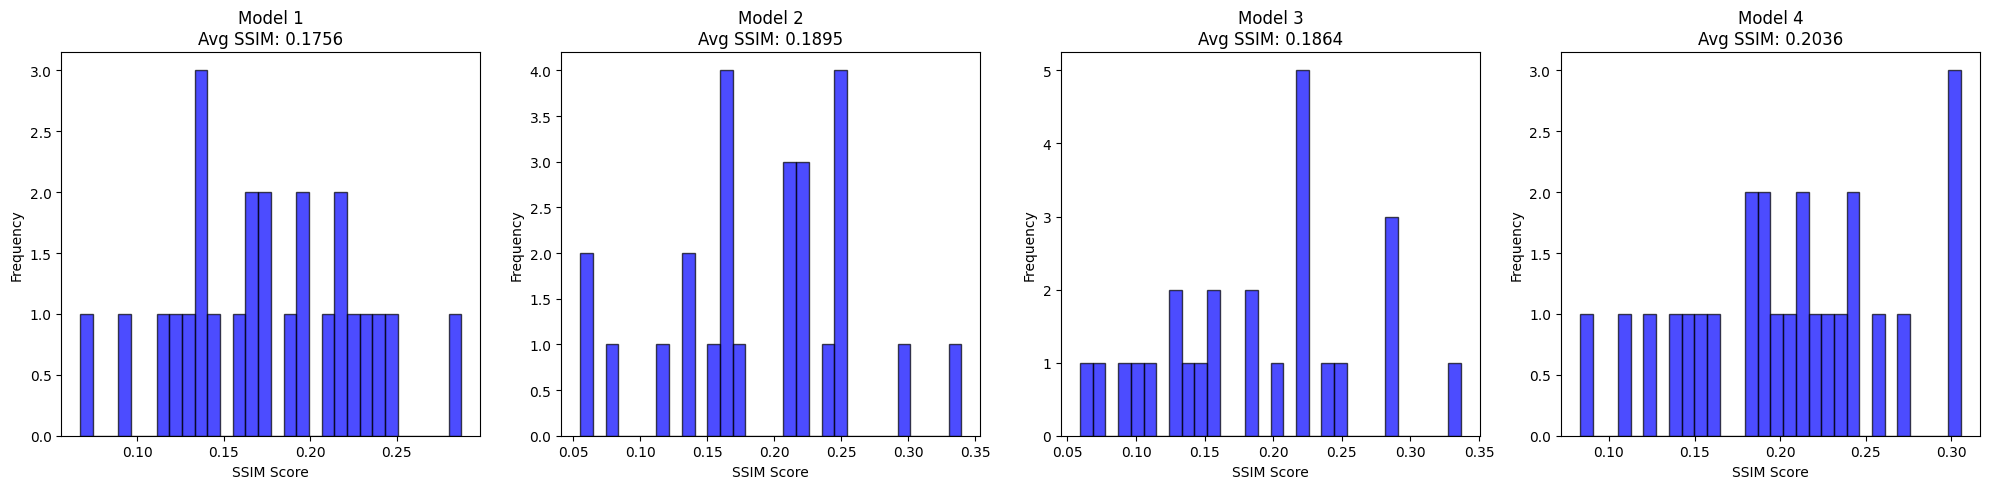

Model 1 - Average SSIM: 0.1756
Model 2 - Average SSIM: 0.1895
Model 3 - Average SSIM: 0.1864
Model 4 - Average SSIM: 0.2036


In [ ]:
from skimage.metrics import structural_similarity as ssim
import numpy as np
import matplotlib.pyplot as plt

# Initialize storage for SSIM scores for each model
ssim_scores_models = {1: [], 2: [], 3: [], 4: []}

# Distribute images into 4 models based on indices
for i, (real_img, gen_img) in enumerate(zip(resized_cropped_real_images_array_X, generated_images_array_X)):
    model_id = (i % 4) + 1
    score, _ = ssim(real_img, gen_img, full=True, win_size=win_size, channel_axis=-1)
    ssim_scores_models[model_id].append(score)

# Compute average SSIM for each model
average_ssim_models = {model_id: np.mean(scores) for model_id, scores in ssim_scores_models.items()}

# Plot histograms for each model in one row
plt.figure(figsize=(20, 5))  # Adjust width for a single row
for model_id in range(1, 5):
    plt.subplot(1, 4, model_id)  # Single row with 4 columns
    plt.hist(ssim_scores_models[model_id], bins=30, color='blue', edgecolor='black', alpha=0.7)
    plt.title(f"Model {model_id}\nAvg SSIM: {average_ssim_models[model_id]:.4f}")
    plt.xlabel("SSIM Score")
    plt.ylabel("Frequency")

# Save the figure
plt.tight_layout()
plt.savefig("ssim_25_indi.pdf", dpi=600)
plt.show()
# Print the average SSIM for each model
for model_id, avg_ssim in average_ssim_models.items():
    print(f"Model {model_id} - Average SSIM: {avg_ssim:.4f}")


In [ ]:
ssimvalues = []

# Print the average SSIM for each model
for model_id, avg_ssim in average_ssim_models.items():
    print(f"Model {model_id} - Average SSIM: {avg_ssim:.4f}")
    ssimvalues.append(avg_ssim)
print("Average", np.mean(np.array(ssimvalues)))

Model 1 - Average SSIM: 0.1756
Model 2 - Average SSIM: 0.1895
Model 3 - Average SSIM: 0.1864
Model 4 - Average SSIM: 0.2036
Average 0.18876430303031688


In [ ]:
%%capture
import torch
from torchvision.utils import save_image
import os
import tempfile
from torch_fidelity import calculate_metrics

# Normalize images to [0, 1] and convert to PyTorch tensors
def prepare_images(images):
    return torch.tensor(images).permute(0, 2, 1).float() / 255.0  # Convert [N, H, W, C] to [N, C, H, W]

# Initialize storage for FID scores for each model
fid_scores_models = {1: [], 2: [], 3: [], 4: []}

# Distribute images into 4 models based on indices
for i, (real_img, gen_img) in enumerate(zip(resized_cropped_real_images_array_X, generated_images_array_X)):
    model_id = (i % 4) + 1

    # Convert NumPy arrays to PyTorch tensors and prepare images for FID calculation
    real_img_tensor = torch.tensor(real_img).unsqueeze(0)  # Convert to tensor and add batch dimension
    gen_img_tensor = torch.tensor(gen_img).unsqueeze(0)  # Convert to tensor and add batch dimension

    # Normalize and prepare images for FID calculation (to [0, 1] and [N, C, H, W] format)
    real_image_tensor = prepare_images(real_img_tensor)
    gen_image_tensor = prepare_images(gen_img_tensor)

    # Use temporary directories to store images for each model
    with tempfile.TemporaryDirectory() as real_dir, tempfile.TemporaryDirectory() as gen_dir:
        # Save real images
        save_image(real_image_tensor[0], os.path.join(real_dir, f"real_{i}.png"))
        # Save generated images
        save_image(gen_image_tensor[0], os.path.join(gen_dir, f"gen_{i}.png"))

        # Calculate FID for this model
        metrics = calculate_metrics(
            input1=real_dir,
            input2=gen_dir,
            fid=True,  # Enable FID calculation
            verbose=True
        )
        fid_score = metrics['frechet_inception_distance']

        # Store FID scores for each model
        fid_scores_models[model_id].append(fid_score)

# Compute average FID for each model
average_fid_models = {model_id: np.mean(scores) for model_id, scores in fid_scores_models.items()}



In [ ]:

# Print the average FID for each model
for model_id, avg_fid in average_fid_models.items():
    print(f"Model {model_id} - Average FID: {avg_fid:.4f}")

Model 1 - Average FID: 405.3206
Model 2 - Average FID: 397.0614
Model 3 - Average FID: 391.5588
Model 4 - Average FID: 437.9834


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━

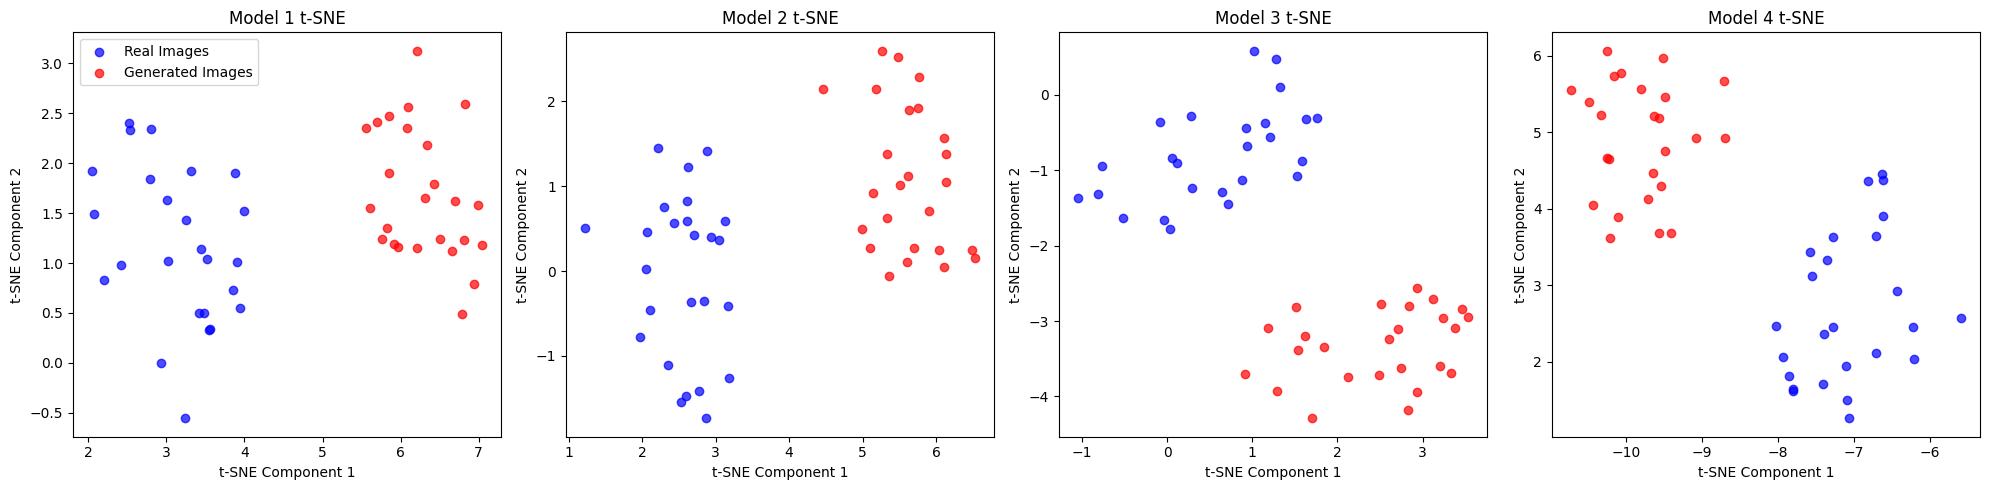

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Function to extract features using ResNet50
def extract_features(img_array, model):
    img_resized = tf.image.resize(img_array, (224, 224))  # Resize to 224x224 for ResNet50
    img_preprocessed = preprocess_input(img_resized.numpy())  # Preprocessing for ResNet50
    img_expanded = np.expand_dims(img_preprocessed, axis=0)  # Add batch dimension
    features = model.predict(img_expanded)  # Get features from ResNet50
    return features.flatten()  # Flatten to 1D vector

# Load the pretrained ResNet50 model without top layers (for feature extraction)
resnet_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Initialize storage for features and labels for each model
features_by_model = {1: [], 2: [], 3: [], 4: []}
labels_by_model = {1: [], 2: [], 3: [], 4: []}

# Extract features for real and generated images
for i, (real_img, gen_img) in enumerate(zip(resized_cropped_real_images_array, generated_images_array)):
    model_id = (i % 4) + 1
    real_features = extract_features(real_img, resnet_model)
    gen_features = extract_features(gen_img, resnet_model)
    features_by_model[model_id].extend([real_features, gen_features])
    labels_by_model[model_id].extend([0, 1])  # 0 for real, 1 for generated

# Prepare the t-SNE plots for each model
plt.figure(figsize=(20, 5))  # Adjust the width for a single row

for model_id in range(1, 5):
    # Combine features and labels for t-SNE
    features = np.array(features_by_model[model_id])
    labels = np.array(labels_by_model[model_id])

    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(features)

    # Plot t-SNE results
    plt.subplot(1, 4, model_id)
    plt.scatter(tsne_results[labels == 0, 0], tsne_results[labels == 0, 1], c='blue', label='Real Images', alpha=0.7)
    plt.scatter(tsne_results[labels == 1, 0], tsne_results[labels == 1, 1], c='red', label='Generated Images', alpha=0.7)
    plt.title(f"Model {model_id} t-SNE")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    if model_id == 1:  # Add legend only for the first plot
        plt.legend()

# Save the figure
plt.tight_layout()
plt.savefig("tsne_25_indi.pdf", dpi=600)
plt.show()


In [ ]:
from tqdm import tqdm
from PIL import Image
import numpy as np
import os
from natsort import natsorted

def load_two_image_sets(folder, num_images=100):
    """
    Load two distinct lists of images from a folder, each containing `num_images` images.
    """
    # Get all image files in the folder
    image_files = [f for f in os.listdir(folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Sort files naturally for consistent order
    sorted_files = natsorted(image_files)

    # Ensure there are enough images to select distinct sets
    total_images = len(sorted_files)
    if total_images < 2 * num_images:
        raise ValueError(f"Not enough images in the folder. Found {total_images}, required at least {2 * num_images}.")

    # Shuffle and split into two distinct sets
    np.random.shuffle(sorted_files)
    set1_files = sorted_files[:num_images]
    set2_files = sorted_files[num_images:2 * num_images]

    # Load images into two separate lists
    set1_images = []
    set2_images = []

    for file in tqdm(set1_files, desc=f"Loading images for Set 1 from {folder}"):
        path = os.path.join(folder, file)
        try:
            img = Image.open(path).convert("RGB")
            set1_images.append(img)
        except Exception as e:
            print(f"Error loading {file} for Set 1: {e}")

    for file in tqdm(set2_files, desc=f"Loading images for Set 2 from {folder}"):
        path = os.path.join(folder, file)
        try:
            img = Image.open(path).convert("RGB")
            set2_images.append(img)
        except Exception as e:
            print(f"Error loading {file} for Set 2: {e}")

    return set1_images, set2_images  # Return two distinct lists of PIL images
real_data_path = "/content/drive/MyDrive/Public/samlet_greyscale"

# Load two distinct lists of images
list1_images, list2_images = load_two_image_sets(real_data_path, num_images=100)


Loading images for Set 1 from /content/drive/MyDrive/Public/samlet_greyscale: 100%|██████████| 100/100 [00:34<00:00,  2.87it/s]
Loading images for Set 2 from /content/drive/MyDrive/Public/samlet_greyscale: 100%|██████████| 100/100 [00:10<00:00,  9.47it/s]


In [ ]:
cropped_real_images1 = []
cropped_real_images2 = []

for each_img in list1_images:
  croppedimg = crop_bottom_center(each_img, 1024)
  cropped_real_images1.append(croppedimg)

for each_img in list2_images:
  croppedimg = crop_bottom_center(each_img, 1024)
  cropped_real_images2.append(croppedimg)

In [ ]:
resized_cropped_real_images1 = [img.resize((256, 256)) for img in cropped_real_images1]
resized_cropped_real_images2 = [img.resize((256, 256)) for img in cropped_real_images2]


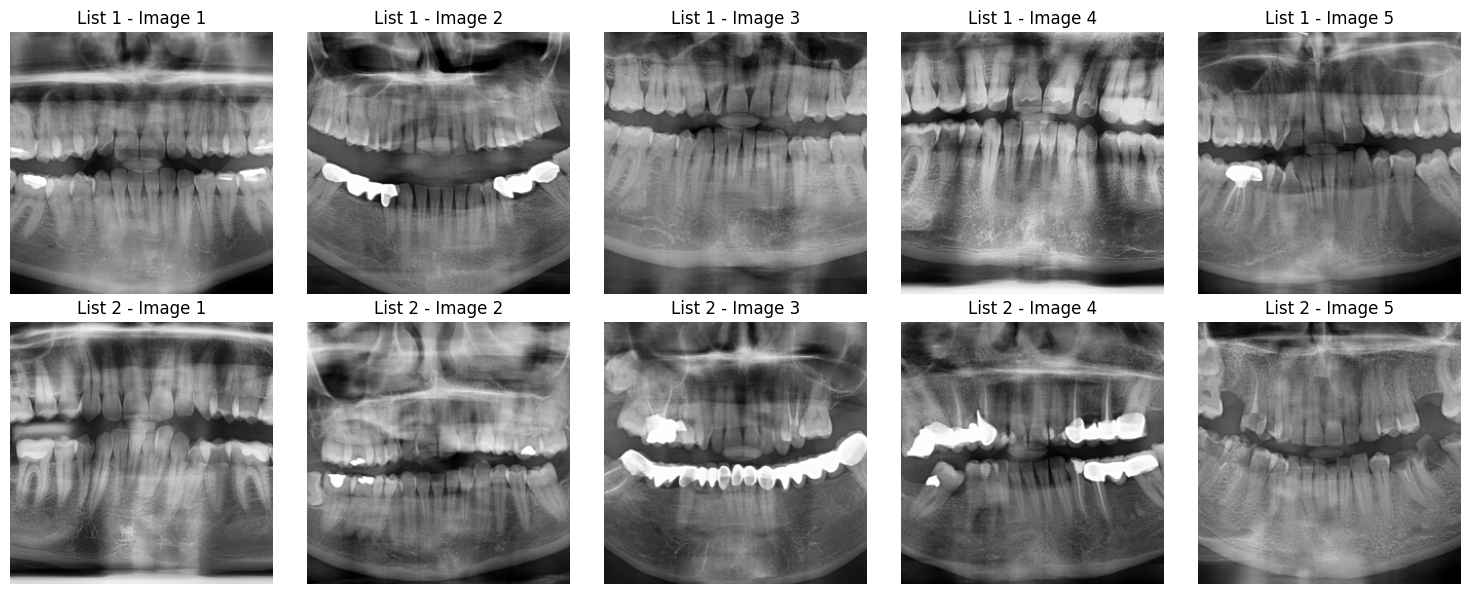

In [ ]:
import matplotlib.pyplot as plt

# Display 5 images from each cropped list in two rows
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# First row: Images from cropped_real_images1
for i, ax in enumerate(axes[0]):
    ax.imshow(resized_cropped_real_images1[i])
    ax.axis("off")
    ax.set_title(f"List 1 - Image {i+1}")

# Second row: Images from cropped_real_images2
for i, ax in enumerate(axes[1]):
    ax.imshow(resized_cropped_real_images2[i])
    ax.axis("off")
    ax.set_title(f"List 2 - Image {i+1}")

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Convert lists of PIL images to arrays of arrays
resized_cropped_real_images1_array = np.array([np.asarray(img) for img in resized_cropped_real_images1])
resized_cropped_real_images2_array = np.array([np.asarray(img) for img in resized_cropped_real_images2])

# Convert lists of PIL images to arrays of arrays
resized_cropped_real_images1_array_X = np.array([np.asarray(img.convert("L")) for img in resized_cropped_real_images1])
resized_cropped_real_images2_array_X = np.array([np.asarray(img.convert("L")) for img in resized_cropped_real_images2])

# Print the shapes to confirm
print("Resized Cropped Real Images Array1 Shape:", resized_cropped_real_images1_array.shape)
print("Resized Cropped Real Images Array2 Shape:", resized_cropped_real_images2_array.shape)


Resized Cropped Real Images Array1 Shape: (100, 256, 256, 3)
Resized Cropped Real Images Array2 Shape: (100, 256, 256, 3)


Average SSIM: 0.13720463831094906


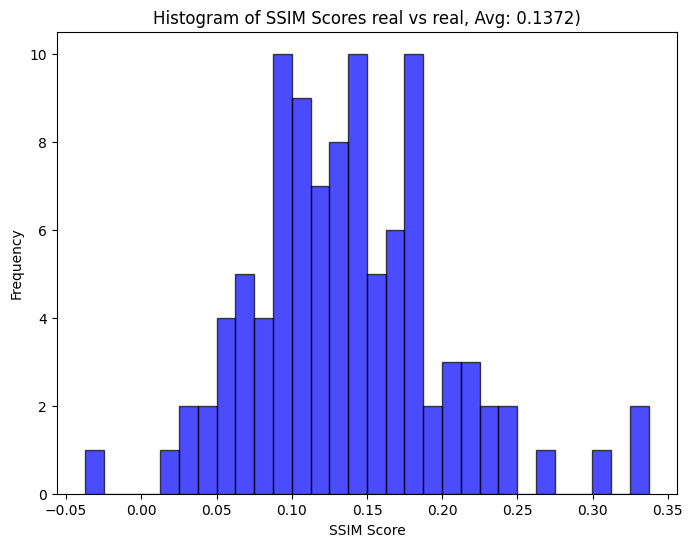

In [ ]:
from skimage.metrics import structural_similarity as ssim
import numpy as np
import matplotlib.pyplot as plt

# Determine the minimum dimension of your images
min_dim = min(resized_cropped_real_images1_array_X[0].shape[:2])
# win_size = min(7, min_dim if min_dim % 2 == 1 else min_dim - 1)  # Ensure win_size is odd and valid
win_size = win_size
# print(f"Using win_size: {win_size}")

# Calculate SSIM for each pair of images
ssim_scores = []

for real_img, gen_img in zip(resized_cropped_real_images1_array_X, resized_cropped_real_images2_array_X):
    score, _ = ssim(real_img, gen_img, full=True, win_size=win_size, channel_axis=-1)
    ssim_scores.append(score)

# Convert to NumPy array for further processing
ssim_scores = np.array(ssim_scores)

# Compute the average SSIM
average_ssim = np.mean(ssim_scores)
print(f"Average SSIM: {average_ssim}")

# Plot the histogram of SSIM scores
plt.figure(figsize=(8, 6))
plt.hist(ssim_scores, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title(f"Histogram of SSIM Scores real vs real, Avg: {average_ssim:.4f})")  # Add average SSIM to title
plt.xlabel("SSIM Score")
plt.ylabel("Frequency")
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("ssim_100_avg_real_vs_real.pdf", dpi=600)
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━

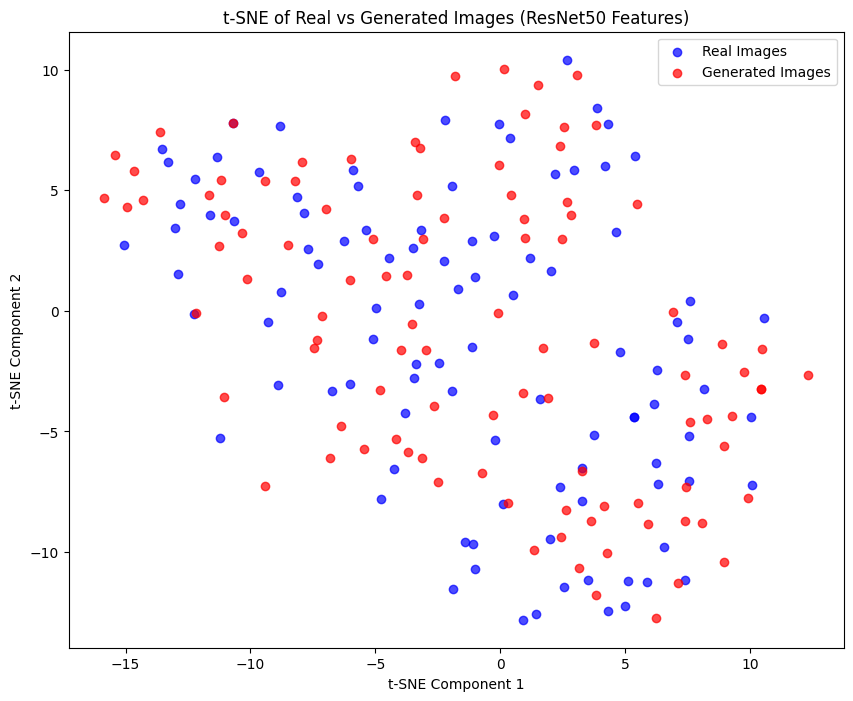

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Function to extract features using ResNet50
def extract_features(img_array, model):
    # Resize and preprocess image array for the model
    img_resized = tf.image.resize(img_array, (224, 224))  # Resize to 224x224 for ResNet50
    img_preprocessed = preprocess_input(img_resized.numpy())  # Preprocessing for ResNet50
    img_expanded = np.expand_dims(img_preprocessed, axis=0)  # Add batch dimension
    features = model.predict(img_expanded)  # Get features from ResNet50
    return features.flatten()  # Flatten to 1D vector

# Load the pretrained ResNet50 model without top layers (for feature extraction)
resnet_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Extract features for real and generated images
real_image_features = []
generated_image_features = []

for real_img, gen_img in zip(resized_cropped_real_images1_array, resized_cropped_real_images2_array):
    real_features = extract_features(real_img, resnet_model)
    generated_features = extract_features(gen_img, resnet_model)
    real_image_features.append(real_features)
    generated_image_features.append(generated_features)

# Convert lists to NumPy arrays
real_image_features = np.array(real_image_features)
generated_image_features = np.array(generated_image_features)

# Combine the real and generated image features for t-SNE
all_features = np.concatenate([real_image_features, generated_image_features], axis=0)
labels = np.concatenate([np.zeros(len(real_image_features)), np.ones(len(generated_image_features))])

# Apply t-SNE to reduce the dimensionality to 2D for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(all_features)

# Plot t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:len(real_image_features), 0], tsne_results[:len(real_image_features), 1], c='blue', label='Real Images', alpha=0.7)
plt.scatter(tsne_results[len(real_image_features):, 0], tsne_results[len(real_image_features):, 1], c='red', label='Generated Images', alpha=0.7)
plt.title("t-SNE of Real vs Generated Images (ResNet50 Features)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.savefig("tsne_100_avg_real_vs_real.pdf", dpi=600)
plt.show()



In [ ]:
import torch
from torchvision.utils import save_image
import os
import tempfile
from torch_fidelity import calculate_metrics

# Normalize images to [0, 1] and convert to PyTorch tensors
def prepare_images(images):
    return torch.tensor(images).permute(0, 2, 1).float() / 255.0  # Convert [N, H, W, C] to [N, C, H, W]

# Prepare real and generated images
real_images_tensor = prepare_images(resized_cropped_real_images1_array_X)
generated_images_tensor = prepare_images(resized_cropped_real_images2_array_X)

# Use temporary directories to store images
with tempfile.TemporaryDirectory() as real_dir, tempfile.TemporaryDirectory() as gen_dir:
    # Save real images
    for i, img in enumerate(real_images_tensor):
        save_image(img, os.path.join(real_dir, f"real_{i}.png"))
    # Save generated images
    for i, img in enumerate(generated_images_tensor):
        save_image(img, os.path.join(gen_dir, f"gen_{i}.png"))

    # Calculate FID
    metrics = calculate_metrics(
        input1=real_dir,
        input2=gen_dir,
        fid=True,  # Enable FID calculation
        verbose=True
    )
    fid_score = metrics['frechet_inception_distance']

print(f"FID Score: {fid_score}")


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmptejpcla8" with extensions png,jpg,jpeg
Found 100 samples
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmplwvjx9sf" with extensions png,jpg,jpeg
Found 100 samples
Processing samples


FID Score: 88.60802213202493


Frechet Inception Distance: 88.60802213202493
